<a href="https://colab.research.google.com/github/farahdbah/RFM-analysis-for-ecommerce-dataset/blob/main/data_analyst_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# primary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# import data library
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read dataset
df = pd.read_csv ('/content/drive/My Drive/DA_Project/ecommerce_data.csv', encoding='unicode_escape')

# **Data Type Exploration**

In [ ]:
# data type
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


The type of InvoiceDate in data frame is object, it should be datetime, it will change through the data cleansing after check the data type



In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Display Missing Value

In [ ]:
# show column contains at least one value of zero
df.columns[df.isin([0]).any()]

Index(['UnitPrice'], dtype='object')

In [ ]:
# show columns contains at least one missing value (NaN)
df.columns[df.isna().any()]

Index(['Description', 'CustomerID'], dtype='object')

In [ ]:
# method to display the missing value in each columns of the data frame
df.isna().sum()


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


# **Data Cleaning**

replace the 0 value with the mean of data and replace missing value with predetermined text

In [ ]:
# calculate the mean of unit price
unit_price_mean = sum(df['UnitPrice'])/len(df['UnitPrice'])

# replace the 0 value with mean of data
df['UnitPrice'] = df['UnitPrice'].replace(0, unit_price_mean)

In [ ]:
# replace missing value with predetermined text
df['Description'].fillna('No description available')

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
541904,PACK OF 20 SPACEBOY NAPKINS
541905,CHILDREN'S APRON DOLLY GIRL
541906,CHILDRENS CUTLERY DOLLY GIRL
541907,CHILDRENS CUTLERY CIRCUS PARADE


In [ ]:
# show missing value remaining with new column
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
# Function to replace NaN in CustomerID with custom text
def fill_customer_id(row):
    if pd.isna(row['CustomerID']):
        return f"Customer of Invoice Nº {row['InvoiceNo']}"
    else:
        return row['CustomerID']

# Apply the function to each row
df['CustomerID'] = df.apply(fill_customer_id, axis=1)

# Show how many missing values remain in each column of the DataFrame
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


# Change Data Type

In [ ]:
# change the data type of invoice date to date time
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# review the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


There are several negative values in quantity and unit price data, it should be deleted to avoid non make sense result

In [ ]:
# Delete the negative values in quantity column
df["Quantity"] = df["Quantity"].mask(df["Quantity"] < 0, np.nan)

In [ ]:
# Delete the negative values in unit price column
df["UnitPrice"] = df["UnitPrice"].mask(df["UnitPrice"] < 0, np.nan)

In [ ]:
# Delete the negative values in total price column
df["TotalPrice"] = df["TotalPrice"].mask(df["TotalPrice"] < 0, np.nan)

# **Exploratory Data Analysis**

The Exploratory data analysis including:
1. Calculate the top 10 product sales by product category
2. Calculate the top 10 product sales by revenue
3. Trend of total sales per month
4. The most customer came from
5. Trend of total customer per month
6. Proportion of Success and Cancellation sale

Descriptive Statistics

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,TotalPrice
count,531285.000000,541909,541907.000000,531283.000000
mean,10.655262,2011-07-04 13:34:57.156386048,4.673357,20.707354
min,1.000000,2010-12-01 08:26:00,0.001000,0.001000
25%,1.000000,2011-03-28 11:34:00,1.250000,3.780000
50%,3.000000,2011-07-19 17:17:00,2.100000,9.900000
75%,10.000000,2011-10-19 11:27:00,4.130000,17.700000
max,80995.000000,2011-12-09 12:50:00,38970.000000,168469.600000
std,156.830323,NaN,94.394912,287.715642


1. Top 10 Product Sales by Category

In [ ]:
sales_by_product = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(sales_by_product)

Description
PAPER CRAFT , LITTLE BIRDIE           80995.0
MEDIUM CERAMIC TOP STORAGE JAR        78033.0
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047.0
JUMBO BAG RED RETROSPOT               48478.0
WHITE HANGING HEART T-LIGHT HOLDER    37895.0
POPCORN HOLDER                        36761.0
ASSORTED COLOUR BIRD ORNAMENT         36461.0
PACK OF 72 RETROSPOT CAKE CASES       36419.0
RABBIT NIGHT LIGHT                    30788.0
MINI PAINT SET VINTAGE                26633.0
Name: Quantity, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

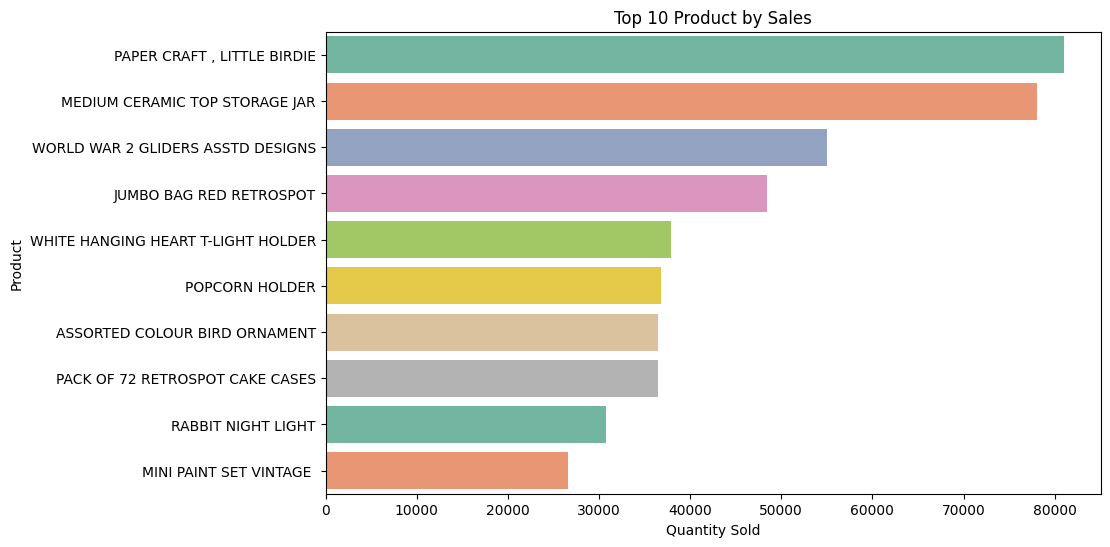

In [ ]:
sales_by_product = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x= sales_by_product.values, y= sales_by_product.index, palette = 'Set2')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.title('Top 10 Product by Sales')
plt.show

The plot shows that the most sold product is "World War 2 Gliders Asstd Design" with more than 50000 sales. "Jumbo Bag Red Retrospot" is the second product that sold the most in the ecommerce wth total sales more than 40000.   

2. Top 10 Sales Product by Revenue

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
top_products_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending = False).head(10)
print (top_products_revenue)

Description
DOTCOM POSTAGE                        206257.992227
REGENCY CAKESTAND 3 TIER              174535.462250
PAPER CRAFT , LITTLE BIRDIE           168469.600000
WHITE HANGING HEART T-LIGHT HOLDER    106311.214455
PARTY BUNTING                          99522.774455
JUMBO BAG RED RETROSPOT                94358.494455
MEDIUM CERAMIC TOP STORAGE JAR         81700.920000
Manual                                 78140.486682
POSTAGE                                78101.880000
RABBIT NIGHT LIGHT                     66964.990000
Name: TotalPrice, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

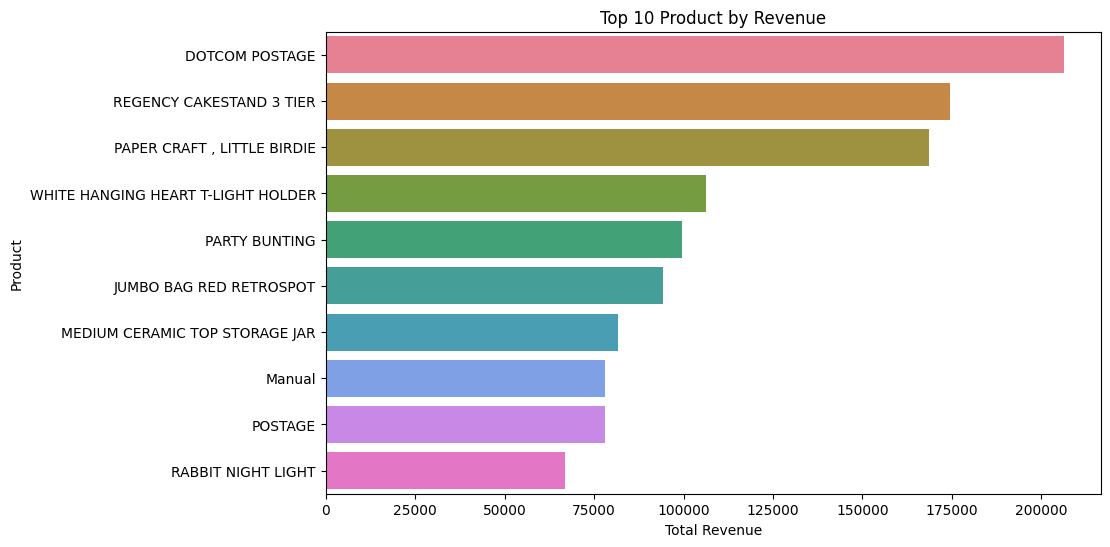

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
top_products_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending = False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x= top_products_revenue.values, y= top_products_revenue.index, palette = 'husl')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.title('Top 10 Product by Revenue')
plt.show

The chart above shows that product with highest revenue is "Dotcom Postage" with total revenue more than 200000. The second highest product by revenue is "Regency Cakestand 3 Tier" with total revenue more than 150000  

3. Trend Sales per Month

In [ ]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth').size()
print(monthly_sales)

YearMonth
2010-12    42481
2011-01    35147
2011-02    27707
2011-03    36748
2011-04    29916
2011-05    37030
2011-06    36874
2011-07    39518
2011-08    35284
2011-09    50226
2011-10    60742
2011-11    84711
2011-12    25525
Freq: M, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

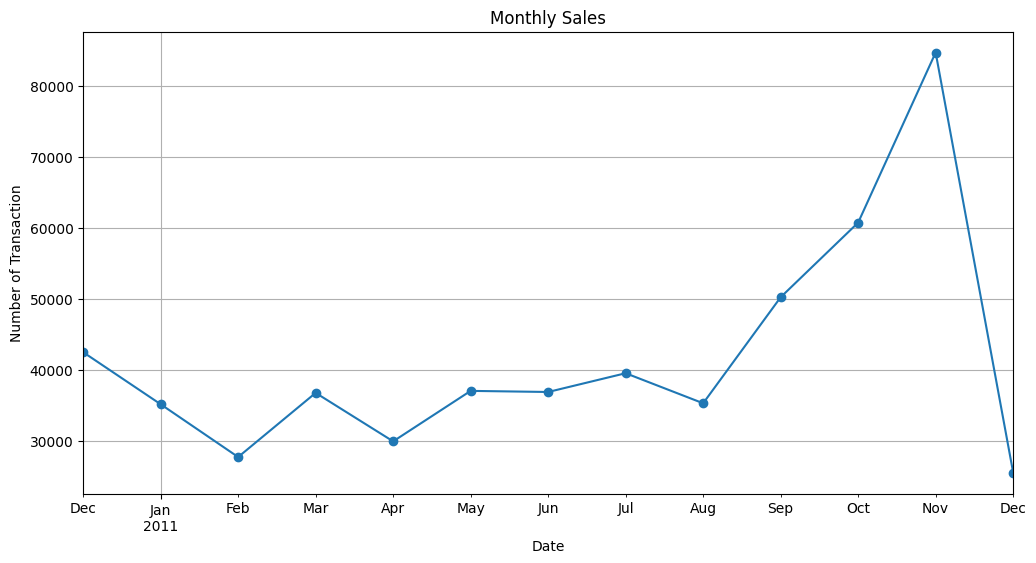

In [ ]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth').size()

plt.figure(figsize=(12,6))
monthly_sales.plot (marker = 'o')
plt.xlabel('Date')
plt.ylabel('Number of Transaction')
plt.title('Monthly Sales')
plt.grid(True)
plt.show

The chart above shows that the revenue growth significantly from September to November and significantly deacresed in December.

4. Customer Identify

to know where did the customer come from the most so it could be the new potential market whether domestic or international.

<function matplotlib.pyplot.show(close=None, block=None)>

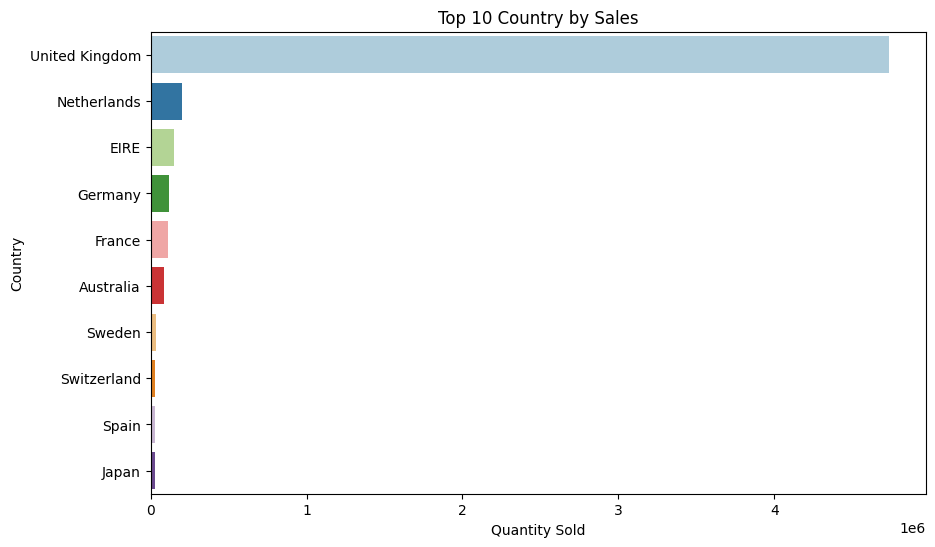

In [ ]:
sales_by_country = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x= sales_by_country.values, y= sales_by_country.index, palette = 'Paired')
plt.xlabel('Quantity Sold')
plt.ylabel('Country')
plt.title('Top 10 Country by Sales')
plt.show

the chart above shows that most customer came from United Kingdom which is a domestic market. This is very important to strengthen the domestic market.

5. Sales by Day of Week

<function matplotlib.pyplot.show(close=None, block=None)>

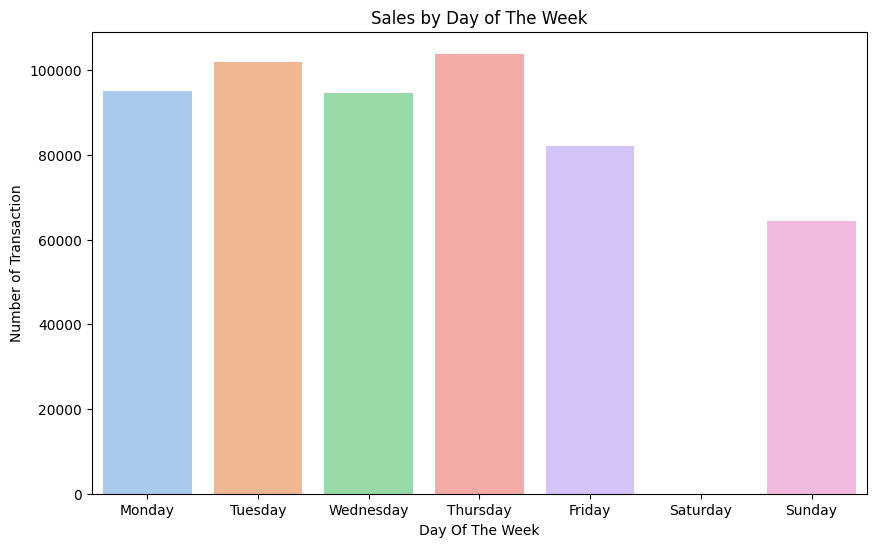

In [ ]:
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
weekday_sales = df.groupby('DayOfWeek').size().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(10,6))
sns.barplot(x = weekday_sales.index, y = weekday_sales.values, palette = 'pastel')
plt.xlabel('Day Of The Week')
plt.ylabel('Number of Transaction')
plt.title('Sales by Day of The Week')
plt.show

The chart above shows that most sales product was on Thursday and Tuesday. It means that the ecommerce should prepare and add more extra employee or shift in the busiest day to avoid an overload package.

6. Sales by Hour of The Day

<function matplotlib.pyplot.show(close=None, block=None)>

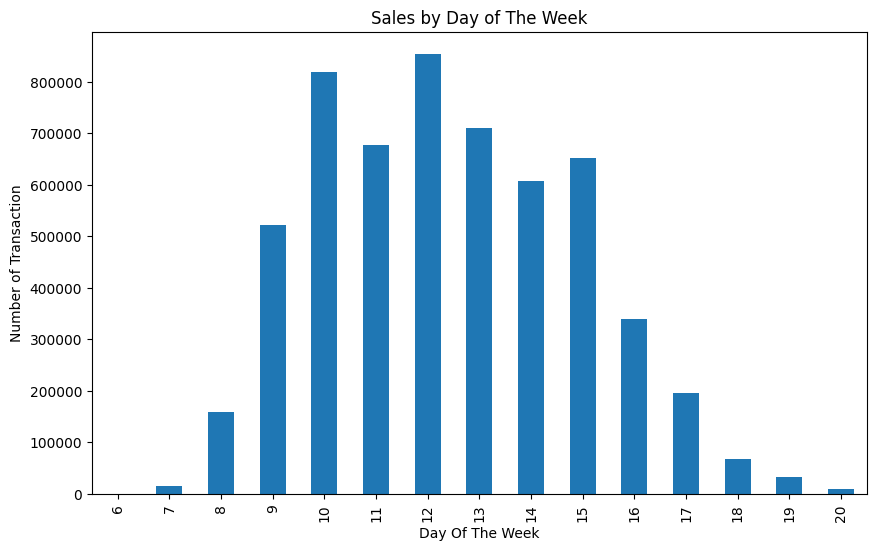

In [ ]:
df['HourOfDay'] = df['InvoiceDate'].dt.hour
sales_by_hour = df.groupby('HourOfDay')['Quantity'].sum()

plt.figure(figsize=(10,6))
sales_by_hour.plot(kind='bar')
plt.xlabel('Day Of The Week')
plt.ylabel('Number of Transaction')
plt.title('Sales by Day of The Week')
plt.show

The chart above shows that peak hour of day is 12 PM which is rest time for employee or student. This also indicate that online advertising would be effective in this hour.

7. The Worst Product to Sale

In [ ]:
# 10 Worst Product to Sale
sales_by_product = df.groupby('Description')['Quantity'].sum().sort_values(ascending=True).head(10)
print(sales_by_product)

Description
wrongly sold sets            0.0
Dotcom set                   0.0
dotcom sold sets             0.0
dotcom sales                 0.0
Dotcom sales                 0.0
POSSIBLE DAMAGES OR LOST?    0.0
damages?                     0.0
damages/showroom etc         0.0
damages/dotcom?              0.0
damages/display              0.0
Name: Quantity, dtype: float64


In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
worst_products_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending = True).head(10)
print (worst_products_revenue)

Description
wrongly sold sets       0.0
faulty                  0.0
Damages                 0.0
ebay                    0.0
Damages/samples         0.0
dotcom sold sets        0.0
dotcom sales            0.0
Discount                0.0
damages?                0.0
damages/showroom etc    0.0
Name: TotalPrice, dtype: float64


download the data that already cleaned to visualize through looker studio

In [ ]:
# Export the data into local drive

from google.colab import files
df.to_csv('df.csv')
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Export the data into google drive
from google.colab import drive
drive.mount('/content/drive')
df.to_csv('/content/drive/My Drive/DA_Project.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# RFM ANALYSIS

RFM Analysis used to indicate behaviour of customer. it is including:
1. How long the time period since customer last order? (Recency)
2. How much purchase frequency that customer did in last period? (frequency)
3. How much purchase value that customer did in last period? (monetary)

In [ ]:
# calculate the last transaction date
last_transaction = df["InvoiceDate"].max()

# calculate the recency, frequency, and monetary
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (last_transaction - x.max()).days,
    "InvoiceNo": "count",
    "TotalPrice": "sum"
}).reset_index()

# create column for RFM table
rfm.columns = ["CustomerID", "recency", "frequency", "monetary"]

# show rfm table
rfm.head()

,CustomerID,recency,frequency,monetary
0,12346.0,325,2,77183.60
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


In [ ]:
rfm.describe()

,recency,frequency,monetary
count,8082.000000,8082.000000,8082.000000
mean,132.116803,67.051349,1361.230540
std,114.035982,185.114186,6800.824868
min,0.000000,1.000000,0.000000
25%,28.000000,1.000000,9.537500
50%,96.000000,19.000000,326.400000
75%,227.000000,70.000000,1140.090000
max,373.000000,7983.000000,282862.021449


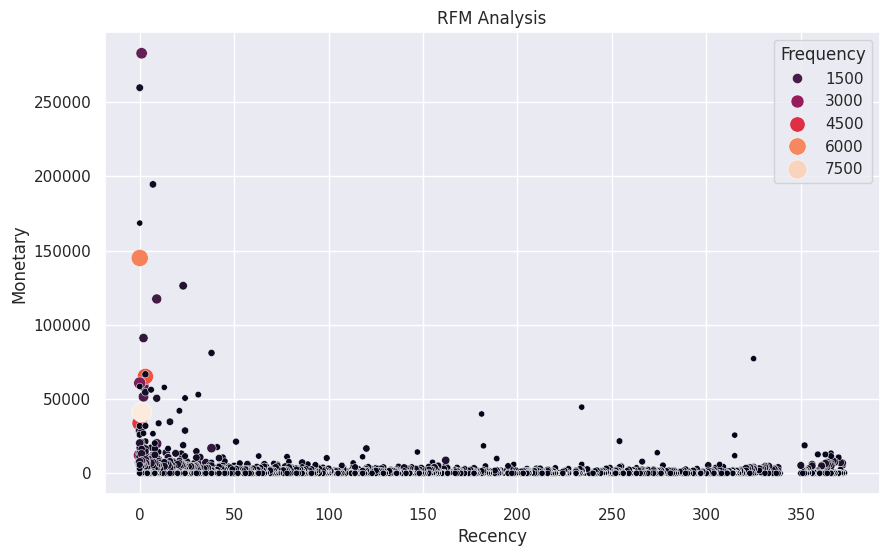

In [ ]:
# customer segmentation distribution
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(x=rfm["recency"], y=rfm["monetary"], data=rfm, size="frequency", sizes=(20, 200), hue="frequency", palette="rocket")

plt.title("RFM Analysis")
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.legend(title="Frequency")

there are any outlier data that should be overcame, it can be overcame with IQR method.

In [ ]:
# Calculate IQR value
Q1 = rfm['monetary'].quantile(0.25)
Q3 = rfm['monetary'].quantile(0.75)
IQR = Q3 - Q1

# Get the data 1.5xIQR from Q1 and Q3
rfm_without_ol = rfm[(rfm['monetary'] >= Q1 - 1.5 * IQR) & (rfm['monetary'] <= Q3 + 1.5 * IQR)]

Text(0, 0.5, 'Monetary')

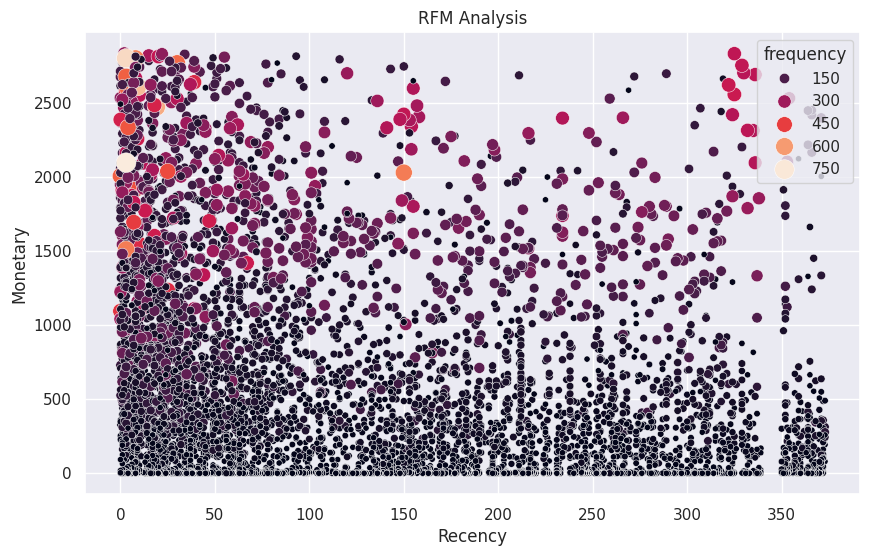

In [ ]:
# Customer segmentation distribution after deleting the outlier data
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(x=rfm_without_ol["recency"], y=rfm_without_ol["monetary"], data=rfm_without_ol, size="frequency", sizes=(20, 200), hue="frequency", palette="rocket")

# Customize the plot
plt.title("RFM Analysis")
plt.xlabel("Recency")
plt.ylabel("Monetary")

In [ ]:
rfm_without_ol.describe()

,recency,frequency,monetary
count,7308.000000,7308.000000,7308.000000
mean,140.347291,40.374384,527.985815
std,113.049947,65.886372,673.018658
min,0.000000,1.000000,0.000000
25%,37.000000,1.000000,4.950000
50%,115.000000,13.000000,250.735000
75%,238.000000,50.000000,777.700000
max,373.000000,756.000000,2832.840000


In [ ]:
# determine the binning range
rfm
rfm.describe()

,recency,frequency,monetary
count,8082.000000,8082.000000,8082.000000
mean,132.116803,67.051349,1361.230540
std,114.035982,185.114186,6800.824868
min,0.000000,1.000000,0.000000
25%,28.000000,1.000000,9.537500
50%,96.000000,19.000000,326.400000
75%,227.000000,70.000000,1140.090000
max,373.000000,7983.000000,282862.021449


In [ ]:
# specify the binning range
recency_bins = [0, 28, 96, 227, 373]
frequency_bins = [0, 1, 19, 70, 7983]
monetary_bins = [0, 10, 326, 1140, 282862]

# Apply binning range to the determine RFM Score
rfm["R"] = pd.cut(rfm["recency"], bins=recency_bins, labels=["1", "2", "3", "4"])
rfm["F"] = pd.cut(rfm["frequency"], bins=frequency_bins, labels=["1", "2", "3", "4"])
rfm["M"] = pd.cut(rfm["monetary"], bins=monetary_bins, labels=["1", "2", "3", "4"])

# Combining the RFM Score
rfm["RFM_Score"] = rfm["R"].astype(str) + rfm["F"].astype(str) + rfm["M"].astype(str)
rfm[["CustomerID", "recency", "frequency", "monetary", "RFM_Score"]].head()

,CustomerID,recency,frequency,monetary,RFM_Score
0,12346.0,325,2,77183.60,424
1,12347.0,1,182,4310.00,144
2,12348.0,74,31,1797.24,234
3,12349.0,18,73,1757.55,144
4,12350.0,309,17,334.40,423


In [67]:
# Create customer segmentation column
rfm["Customer_Segment"] = "Undefined"

# Determine the conditions based on RFM score
champion_condition = (rfm["RFM_Score"] == "111")
loyal_condition = (rfm["RFM_Score"] == "114")
big_spender_condition = (rfm["RFM_Score"] == "211")
at_risk_condition = (rfm["RFM_Score"] == "212")
lost_condition = (rfm["RFM_Score"] == "444")

# Named the column based on condition that already defined
rfm.loc[champion_condition, "Customer_Segment"] = "Champion Customers"
rfm.loc[loyal_condition, "Customer_Segment"] = "Loyal Customers"
rfm.loc[big_spender_condition, "Customer_Segment"] = "Big Spenders"
rfm.loc[at_risk_condition, "Customer_Segment"] = "At Risk Customers"
rfm.loc[lost_condition, "Customer_Segment"] = "Lost Customers"

rfm.head()

,CustomerID,recency,frequency,monetary,R,F,M,RFM_Segment,RFM_Score,Customer_Segment
0,12346.0,325,2,77183.60,4,2,4,424,424,Undefined
1,12347.0,1,182,4310.00,1,4,4,124,144,Undefined
2,12348.0,74,31,1797.24,2,3,4,224,234,Undefined
3,12349.0,18,73,1757.55,1,4,4,124,144,Undefined
4,12350.0,309,17,334.40,4,2,3,423,423,Undefined


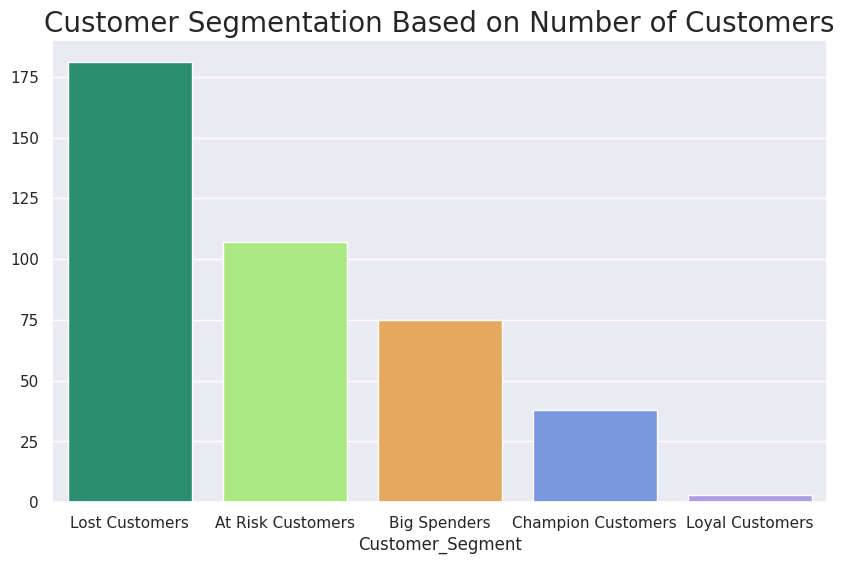

In [68]:
# select cuctomer segmentation that want to show in the chart
show_segments = ["Champion Customers", "Loyal Customers", "Big Spenders", "At Risk Customers", "Lost Customers"]
segments_df = rfm[rfm["Customer_Segment"].isin(show_segments)]

# Number of customers in each segment
segments_count = segments_df["Customer_Segment"].value_counts()

colors= ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']

# Data visualization of the number for customers in each segment
plt.figure(figsize=(10, 6))
sns.barplot(x=segments_count.index, y=segments_count.values, palette=colors)
plt.title("Customer Segmentation Based on Number of Customers", size=20)
plt.show()

In [66]:
# select cuctomer segmentation that want to show in the chart
show_segments = ["Champion Customers", "Loyal Customers", "Big Spenders", "At Risk Customers", "Lost Customers"]
segments_df = rfm[rfm["Customer_Segment"].isin(show_segments)]

# Number of customers in each segment
segments_count = segments_df["Customer_Segment"].value_counts()

print(segments_count)

Customer_Segment
Lost Customers        181
At Risk Customers     115
Big Spenders           75
Champion Customers     38
Loyal Customers         3
Name: count, dtype: int64
